In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/smoking-and-other-risk-factors-dataset/Lung_Cancer_Trends_Realistic.csv


In [2]:
import pandas as pd
import numpy as np

# Set seed for reproducibility
np.random.seed(42)

# Number of rows
n_rows = 3000

# Generate realistic data
data = {
    'Patient_ID': [f'P{100000 + i}' for i in range(n_rows)],
    'Age': np.random.randint(25, 90, size=n_rows),
    'Gender': np.random.choice(['Male', 'Female'], size=n_rows),
    'Smoking_Status': np.random.choice(['Never', 'Former', 'Current'], size=n_rows, p=[0.3, 0.3, 0.4]),
    'Years_Smoking': np.random.randint(0, 50, size=n_rows),
    'Cigarettes_Per_Day': np.random.randint(0, 40, size=n_rows),
    'Secondhand_Smoke_Exposure': np.random.choice(['Low', 'Medium', 'High'], size=n_rows),
    'Occupation_Exposure': np.random.choice(['None', 'Asbestos', 'Silica', 'Diesel Fumes'], size=n_rows),
    'Air_Pollution_Level': np.random.choice(['Low', 'Moderate', 'High'], size=n_rows),
    'Family_History': np.random.choice(['Yes', 'No'], size=n_rows),
    'Genetic_Markers_Positive': np.random.choice(['Yes', 'No'], size=n_rows, p=[0.1, 0.9]),
    'BMI': np.round(np.random.normal(25, 5, size=n_rows), 1),
    'Physical_Activity_Level': np.random.choice(['Low', 'Moderate', 'High'], size=n_rows),
    'Alcohol_Consumption': np.random.choice(['None', 'Moderate', 'High'], size=n_rows),
    'Diet_Quality': np.random.choice(['Poor', 'Average', 'Good'], size=n_rows),
    'Region': np.random.choice(['North', 'South', 'East', 'West'], size=n_rows),
    'Income_Level': np.random.choice(['Low', 'Middle', 'High'], size=n_rows),
    'Education_Level': np.random.choice(['Primary', 'Secondary', 'Tertiary'], size=n_rows),
    'Access_to_Healthcare': np.random.choice(['Poor', 'Average', 'Good'], size=n_rows),
    'Screening_Frequency': np.random.choice(['Never', 'Occasionally', 'Regularly'], size=n_rows),
    'Chronic_Lung_Disease': np.random.choice(['Yes', 'No'], size=n_rows, p=[0.2, 0.8]),
    'Lung_Cancer_Stage': np.random.choice(['None', 'Stage I', 'Stage II', 'Stage III', 'Stage IV'], 
                                          size=n_rows, p=[0.8, 0.05, 0.05, 0.05, 0.05]),
    'Diagnosis_Year': np.random.choice(range(2000, 2025), size=n_rows),
    'Survival_Status': np.random.choice(['Alive', 'Deceased'], size=n_rows, p=[0.85, 0.15]),
}

# Create DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv("Lung_Cancer_Trends_Realistic.csv", index=False)

# Preview the data
df.head()


,Patient_ID,Age,Gender,Smoking_Status,Years_Smoking,Cigarettes_Per_Day,Secondhand_Smoke_Exposure,Occupation_Exposure,Air_Pollution_Level,Family_History,...,Diet_Quality,Region,Income_Level,Education_Level,Access_to_Healthcare,Screening_Frequency,Chronic_Lung_Disease,Lung_Cancer_Stage,Diagnosis_Year,Survival_Status
0,P100000,76,Female,Never,6,37,Low,Diesel Fumes,Low,Yes,...,Poor,West,Middle,Tertiary,Good,Regularly,No,Stage II,2008,Alive
1,P100001,39,Male,Never,30,39,Low,Silica,Low,Yes,...,Average,North,Middle,Primary,Poor,Occasionally,Yes,None,2002,Alive
2,P100002,85,Male,Former,47,14,High,Asbestos,Low,Yes,...,Good,South,High,Tertiary,Average,Regularly,No,Stage II,2007,Deceased
3,P100003,45,Female,Current,45,32,Medium,Silica,High,No,...,Good,West,Low,Secondary,Average,Never,Yes,None,2011,Alive
4,P100004,48,Female,Never,46,26,Medium,Silica,Low,No,...,Good,North,Low,Tertiary,Average,Regularly,No,None,2016,Alive


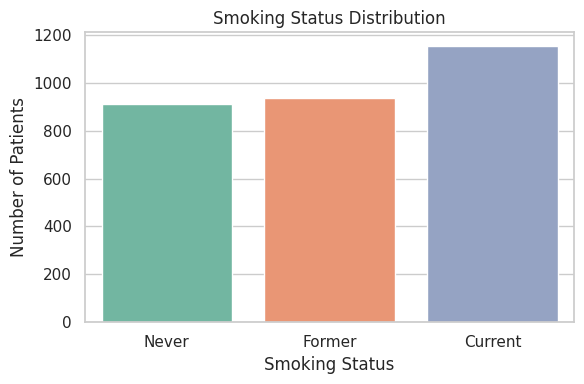

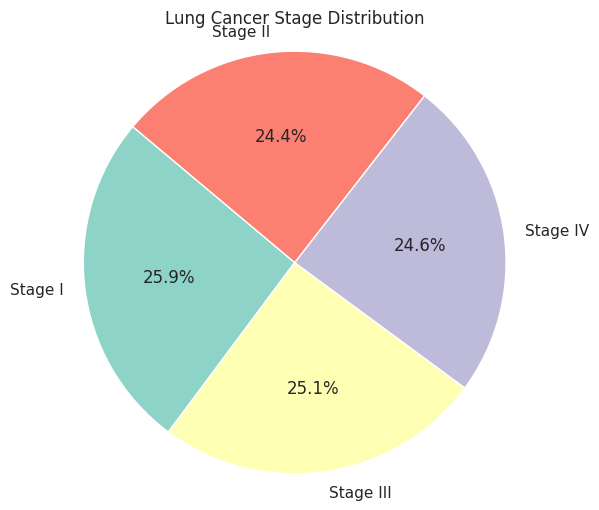

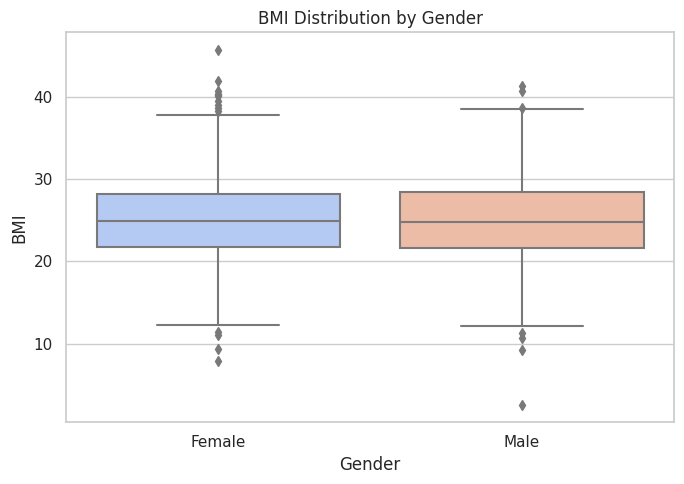

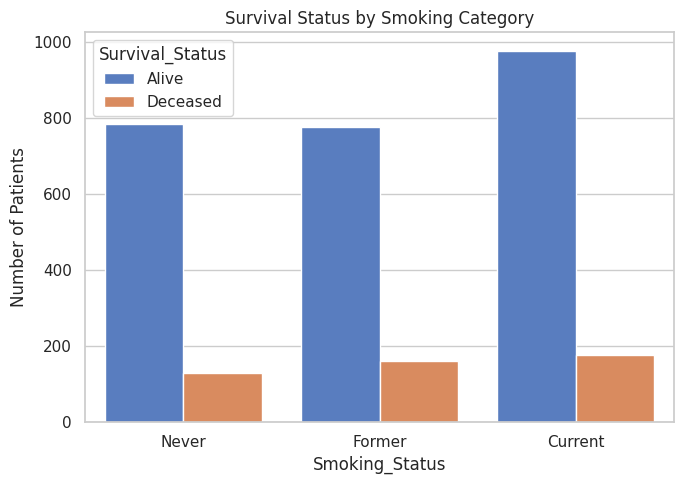

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Lung_Cancer_Trends_Realistic.csv")

# Set seaborn style
sns.set(style="whitegrid")

# Plot 1: Smoking Status Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Smoking_Status', palette='Set2')
plt.title("Smoking Status Distribution")
plt.xlabel("Smoking Status")
plt.ylabel("Number of Patients")
plt.tight_layout()
plt.show()

# Plot 2: Lung Cancer Stage Pie Chart
stage_counts = df['Lung_Cancer_Stage'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(stage_counts, labels=stage_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3"))
plt.title("Lung Cancer Stage Distribution")
plt.axis('equal')
plt.show()

# Plot 3: BMI Distribution by Gender
plt.figure(figsize=(7, 5))
sns.boxplot(data=df, x='Gender', y='BMI', palette='coolwarm')
plt.title("BMI Distribution by Gender")
plt.tight_layout()
plt.show()

# Plot 4: Survival Status by Smoking Status
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='Smoking_Status', hue='Survival_Status', palette='muted')
plt.title("Survival Status by Smoking Category")
plt.ylabel("Number of Patients")
plt.tight_layout()
plt.show()
